In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

Objetivo: Predecir si una persona va a tener un ataque al corazón - Para poder responder al objetivo vamos a usar un dataset heart.csv

Pasos: 
 1. Visualización de Datos - Análisis Exploratorio
             
           Librerías principales (Pandas, Numpy, Matplotlib, Seaborn)
 2. Explorando con datos nulos
             
           Librería principal (Pandas - Invocación isnull())
 3. Explorando datos categóricos
         
           Librería principal (Pandas - Invocación isnull())
 
 4. Procesamiento de Datos
 5. Creación del Modelo
 6. Entrenamiento del Modelo
 
           from sklearn.model_selection import train_test_split
           
 7. Evaluación del Modelo

**1 - Visualización de los Datos - Análisis Exploratorio**

    Age of the person
    Gender of the person
    Chest Pain type chest pain type
    resting blood pressure (in mm Hg)
    cholestoral in mg/dl fetched via BMI sensor
    (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    resting electrocardiographic results
    maximum heart rate achieved
    exercise induced angina (1 = yes; 0 = no)
    Previous peak
    Slope
    number of major vessels (0-3)
    Thal rate
    Target variable

In [2]:
AC = pd.read_csv("heart.csv")

In [3]:
AC.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

**Chequeamos si los valores de la columna output es uniforme**

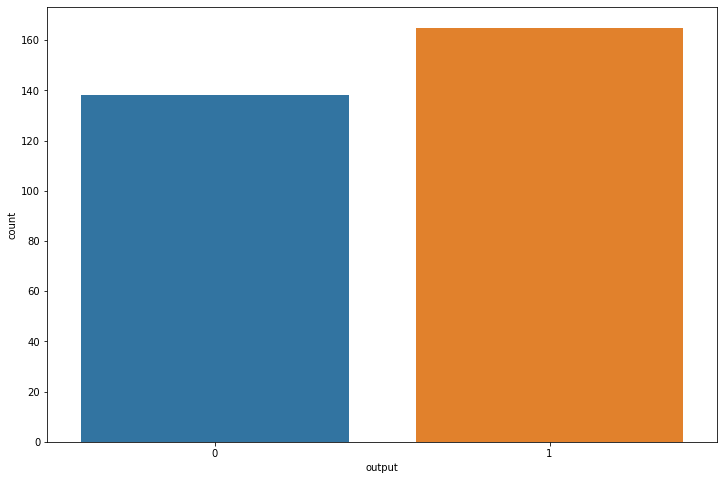

In [5]:
plt.figure(figsize = (12, 8))
sns.countplot(x = 'output', data=AC)

Tenemos 140 aprox con valores 0 y 160 con valores 1

Vamos a visualizar en una matriz de correlación como están correlacionadas las dimensiones

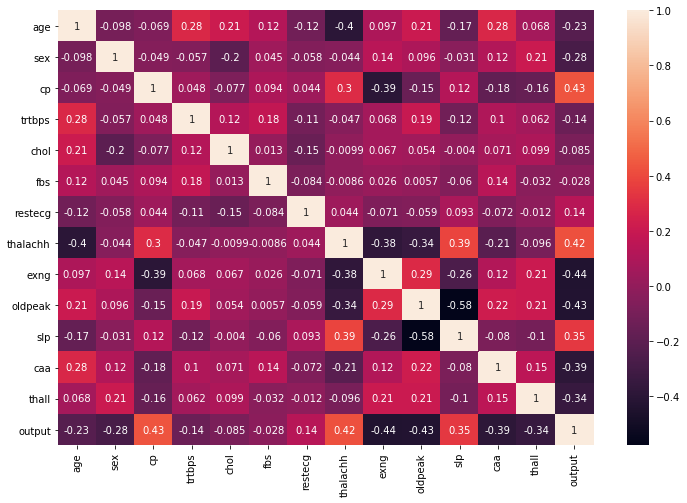

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(AC.corr(), annot=True)

Age of the person

Gender of the person

Chest Pain type chest pain type

resting blood pressure (in mm Hg)

cholestoral in mg/dl fetched via BMI sensor

(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

resting electrocardiographic results

maximum heart rate achieved

exercise induced angina (1 = yes; 0 = no)

Previous peak

Slope

number of major vessels (0-3)

Thal rate

Target variable

In [7]:
AC.corr()['output'].sort_values()

exng       -0.436757
oldpeak    -0.430696
caa        -0.391724
thall      -0.344029
sex        -0.280937
age        -0.225439
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slp         0.345877
thalachh    0.421741
cp          0.433798
output      1.000000
Name: output, dtype: float64

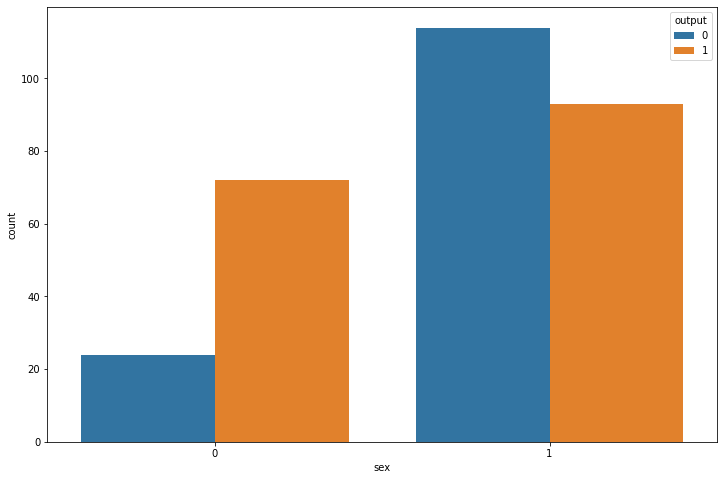

In [8]:
plt.figure(figsize=(12,8))
sns.countplot(x='sex', data=AC, hue='output')

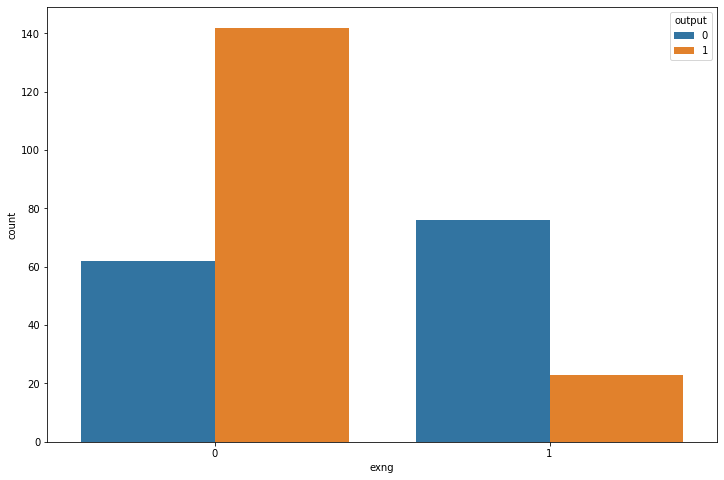

In [9]:
plt.figure(figsize=(12, 8))
sns.countplot(x='exng', data=AC, hue='output')

**2. Explorando con datos nulos**

In [10]:
AC.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

**3. Explorando datos categóricos**

In [11]:
AC.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

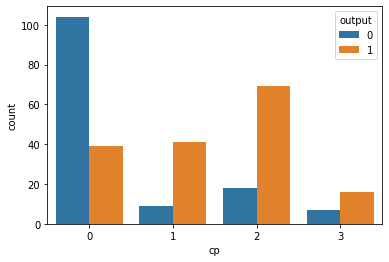

In [12]:
sns.countplot(x='cp', data=AC, hue='output')

In [13]:
AC['cp'] = AC['cp'].apply(lambda x: min(1, x))

In [14]:
AC['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

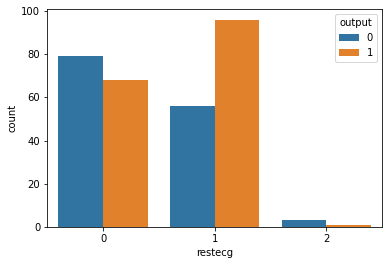

In [15]:
sns.countplot(x='restecg', data=AC, hue='output')

In [17]:
AC['restecg'] = AC['restecg'].apply(lambda x: 1 if x==1 else 0)
AC['restecg'].unique()

array([0, 1], dtype=int64)

In [18]:
AC['slp'].value_counts()

2    142
1    140
0     21
Name: slp, dtype: int64

In [19]:
AC['caa'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

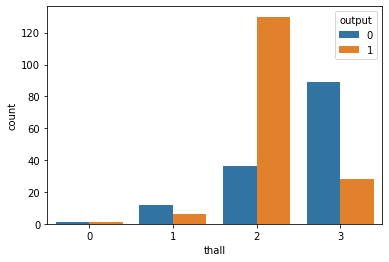

In [20]:
sns.countplot(x='thall', data=AC, hue='output')

**4. Procesamiento de Datos**

In [21]:
AC = pd.concat([AC.drop('thall', axis=1), pd.get_dummies(AC['thall'], drop_first=True)], axis=1)

In [22]:
AC.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,output,1,2,3
0,63,1,1,145,233,1,0,150,0,2.3,0,0,1,1,0,0
1,37,1,1,130,250,0,1,187,0,3.5,0,0,1,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1,0,1,0


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [24]:
#Asigno todas las columnas a X salvo la columna de output que va a ir a la variable Y
X = AC.drop('output', axis=1)
y = AC['output']

 **5. Creación del Modelo y 6. Entrenamiento del Modelo**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

Una forma de normalizar las características / variables de entrada es el escalador Min-Max. Al hacerlo, todas las características se transformarán en el rango [0,1], lo que significa que el valor mínimo y máximo de una característica / variable será 0 y 1, respectivamente.

In [26]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**class sklearn.neural_network.MLPClassifier**(hidden_layer_sizes=100, activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

hidden_layer_sizes : Este parámetro nos permite establecer el número de capas y el número de nodos que deseamos tener en el clasificador de redes neuronales. Cada elemento de la tupla representa el número de nodos en la i-ésima posición, donde i es el índice de la tupla. Por lo tanto, la longitud de la tupla denota el número total de capas ocultas en la red

max_iter: Cantidad máxima de iteraciones.

activation: Función de Activación para las capas ocultas, default=’relu’

    ‘identity’, activación sin operación, útil para implementar cuellos de botella lineales, devuelve f(x) = x

    ‘logistic’, función sigmoid, devuelve f(x) = 1 / (1 + exp(-x)).

    ‘tanh’, función tangente hiperbólica, devuelve f(x) = tanh(x).

    ‘relu’, función relu, devuelve f(x) = max(0, x)

solver: Este parámetro especifica el algoritmo para la optimización del peso en los nodos, default=’adam’

    ‘lbfgs’ es un optimizador de la familia de métodos cuasi-Newton.

    ‘sgd’ se refiere al descenso de gradiente estocástico.

    ‘adam’ se refiere a un optimizador estocástico basado en gradientes propuesto por Kingma, Diederik y Jimmy Ba

random_state: El parámetro permite establecer una semilla para reproducir los mismos resultados

In [27]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

In [28]:
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)

In [29]:
classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=1)

In [30]:
y_pred = classifier.predict(X_test)

In [35]:
print(y_pred)

[0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0]


 **7. Evaluar el Modelo - Matriz de Confusión**

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
cm = confusion_matrix(y_pred, y_test)

In [33]:
print(cm)

[[25  5]
 [ 4 27]]
